# Neural Modeling with Python (Part 2):
## The Hodgkin-Huxley Model

In [2]:
from numpy import *
from pylab import *

* Functions

K Channel

In [5]:
alpha_n = vectorize(lambda v: 0.01*(-v + 10)/(exp((-v+10)/10)-1) 
                    if v != 10 else 0.1)
beta_n  = lambda v: 0.125 * exp(-v/80)
n_inf   = lambda v: alpha_n(v) / (alpha_n(v) + beta_n(v)) 

Na Channel (activating)

In [6]:
alpha_m = vectorize(lambda v: 0.1*(-v + 25)/(exp ((-v+25)/10) -1)
                   if v != 25 else 1)
beta_m  = lambda v: 4* exp(-v/18)
m_inf   = lambda v: alpha_m(v)/(alpha_m(v) + beta_m(v))

Na Channel (inactivating)

In [7]:
alpha_h = lambda v: 0.07*exp(-v/20)
beta_h  = lambda v: 1/(exp((-v + 30) / 10) + 1)
h_inf   = lambda v: alpha_h(v)/(alpha_h(v) + beta_h(v))

* Channel activity

In [8]:
v= arange(-50,151)   # mV
figure()
plot(v, m_inf(v), v, h_inf(v), v, n_inf(v))
legend(('m', 'h', 'n'))
title('Steady state values of ion channel gating variables')
ylabel('Magnitude')
xlabel('Voltage (mV)')

* setup parameters and state variables

In [9]:
T    = 55    # ms
dt   = 0.025 # ms
time = arange(0,T+dt,dt)

* HH Parameters

In [21]:
V_rest  = 0    # mV
Cm      = 1    # uF/cm2
gbar_Na = 120  # mS/cm2
gbar_K  = 36   # mS/cm2
gbar_l  = 0.3  # mS/cm2
E_Na    = 115  # mV
E_K     = -12  # mV
E_l     = 10.613 # mV

In [22]:
Vm      = zeros(len(time))  #mV
Vm[0]   = V_rest
m       = m_inf(V_rest)
h       = h_inf(V_rest)
n       = n_inf(V_rest)

* Stimulus

In [23]:
I = zeros(len(time))
for i,t in enumerate(time):
    if 5 <= t <= 30: I[i] = 10  # uA/cm2

* Simulate model

In [24]:
for i in range(1, len(time)):
    g_Na = gbar_Na*(m**3)*h
    g_K  = gbar_K*(n**4)
    g_l  = gbar_l
    
    m += (alpha_m(Vm[i-1])*(1 - m) - beta_m(Vm[i-1])*m) * dt
    h += (alpha_h(Vm[i-1])*(1 - h) - beta_h(Vm[i-1])*h) * dt
    n += (alpha_n(Vm[i-1])*(1 - n) - beta_n(Vm[i-1])*n) * dt
     
    Vm[i] = Vm[i-1] + (I[i-1] - g_Na*(Vm[i-1] - E_Na) - g_K*(Vm[i-1] - E_K) 
                       - g_l*(Vm[i-1] - E_l)) / Cm * dt

/Users/markstrefford/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/markstrefford/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/markstrefford/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.
/Users/markstrefford/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
/Users/markstrefford/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/Users/markstrefford/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


* Plot membrane potential trace

In [19]:
figure()
plot(time, Vm, time, -30+I)
title('Hodkins-Huxley Example')
ylabel('Membrane potential (mV)')
xlabel('Time (msec)')

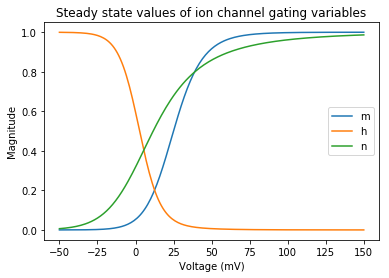

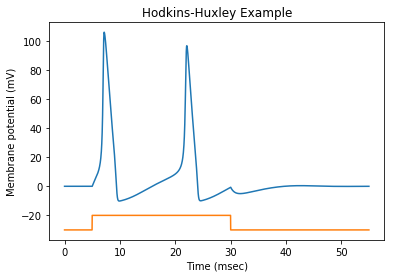

In [20]:
show()